In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#pd.set_option('display.mpl_style', 'default')
%matplotlib inline

In [3]:
range = pd.date_range('2015-01-01', '2015-12-31', freq='15min')
df = pd.DataFrame(index = range)

# Average speed in miles per hour
df['speed'] = np.random.randint(low=0, high=60, size=len(df.index))
# Distance in miles (speed * 0.5 hours)
df['distance'] = df['speed'] * 0.25 
# Cumulative distance travelled
df['cumulative_distance'] = df.distance.cumsum()

In [4]:
df.head()

,speed,distance,cumulative_distance
2015-01-01 00:00:00,58,14.50,14.50
2015-01-01 00:15:00,53,13.25,27.75
2015-01-01 00:30:00,59,14.75,42.50
2015-01-01 00:45:00,16,4.00,46.50
2015-01-01 01:00:00,23,5.75,52.25


# plot datam

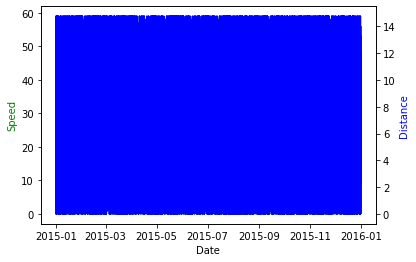

In [5]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(df.index, df['speed'], 'g-')
ax2.plot(df.index, df['distance'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Speed', color='g')
ax2.set_ylabel('Distance', color='b')


plt.show()
plt.rcParams['figure.figsize'] = 12,5

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34945 entries, 2015-01-01 00:00:00 to 2015-12-31 00:00:00
Freq: 15T
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   speed                34945 non-null  int64  
 1   distance             34945 non-null  float64
 2   cumulative_distance  34945 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 1.1 MB


In [7]:
weekly_summary = pd.DataFrame()
weekly_summary['speed'] = df.speed.resample('W').mean()
weekly_summary['distance'] = df.distance.resample('W').sum()
weekly_summary['cumulative_distance'] = df.cumulative_distance.resample('W').last()

#Select only whole weeks
weekly_summary = weekly_summary.truncate(before='2015-01-05', after='2015-12-27')
weekly_summary.head()

,speed,distance,cumulative_distance
2015-01-11,30.122024,5060.50,7940.75
2015-01-18,29.406250,4940.25,12881.00
2015-01-25,30.711310,5159.50,18040.50
2015-02-01,29.819940,5009.75,23050.25
2015-02-08,29.891369,5021.75,28072.00


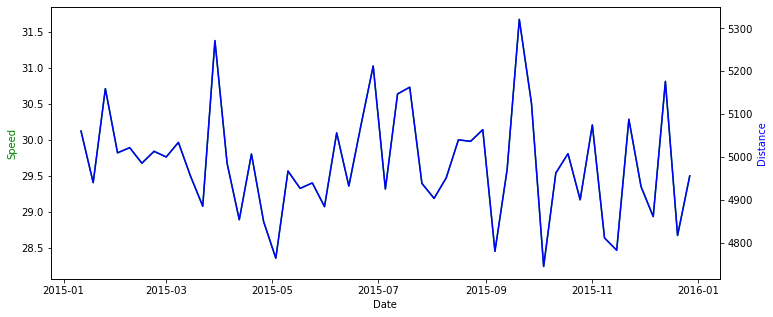

In [8]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(weekly_summary.index, weekly_summary['speed'], 'g-')
ax2.plot(weekly_summary.index, weekly_summary['distance'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Speed', color='g')
ax2.set_ylabel('Distance', color='b')

plt.show()
plt.rcParams['figure.figsize'] = 12,5

In [9]:
annual_summary = pd.DataFrame()
# AS is year-start frequency
annual_summary['speed'] = df.speed.resample('AS').mean()
annual_summary['distance'] = df.speed.resample('AS').sum()
annual_summary['cumulative_distance'] = df.cumulative_distance.resample('AS').last()
annual_summary

,speed,distance,cumulative_distance
2015-01-01,29.679439,1037148,259287.0


## Unsapling data

In [11]:

five_minutely_data = pd.DataFrame()
five_minutely_data['speed'] = df.speed.resample('5min').ffill()
# 5 minutes is 1/12 hours
five_minutely_data['distance'] = five_minutely_data['speed'] * (1/float(12))
five_minutely_data['cumulative_distance'] = five_minutely_data.distance.cumsum()

In [12]:
five_minutely_data.head()

,speed,distance,cumulative_distance
2015-01-01 00:00:00,58,4.833333,4.833333
2015-01-01 00:05:00,58,4.833333,9.666667
2015-01-01 00:10:00,58,4.833333,14.500000
2015-01-01 00:15:00,53,4.416667,18.916667
2015-01-01 00:20:00,53,4.416667,23.333333
